In [1]:
!pip install sktime

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/37.0 MB ? eta -:--:--
   ----------- ---------------------------- 10.2/37.0 MB 57.9 MB/s eta 0:00:01
   -------------------- ------------------- 18.6/37.0 MB 46.9 MB/s eta 0:00:01
   -------------------------------- ------- 30.1/37.0 MB 50.3 MB/s eta 0:00:01
   ---------------------------------------  37.0/37.0 MB 51.0 MB/s eta 0:00:01
   ---------------------------------------- 37.0/37.0 MB 45.3 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.utils.plotting import plot_series

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_csv("imdb_ts.csv")
df.head()

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
3,tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High


In [25]:
df = pd.DataFrame(df)

# Selezioniamo solo le colonne numeriche (cioè i punti temporali)

time_series_columns = df.columns[1:-3]
df_time_series = df[time_series_columns]

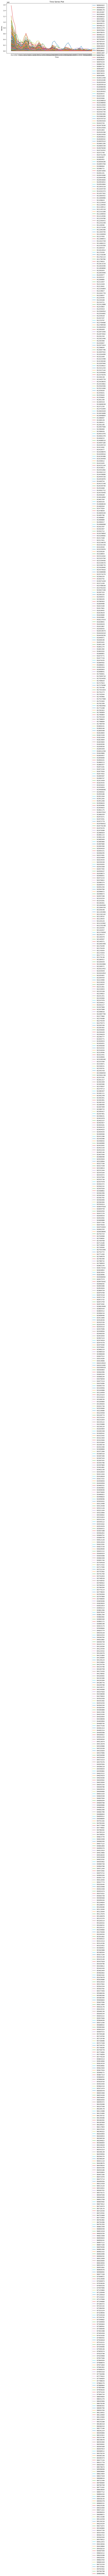

In [ ]:
# Trasponiamo per avere il tempo sull'asse x
df_time_series = df_time_series.T

# Creiamo il grafico
plt.figure(figsize=(12, 6))
for col in df_time_series.columns:
    plt.plot(df_time_series.index, df_time_series[col], label=df['id'][col])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend()
plt.show()

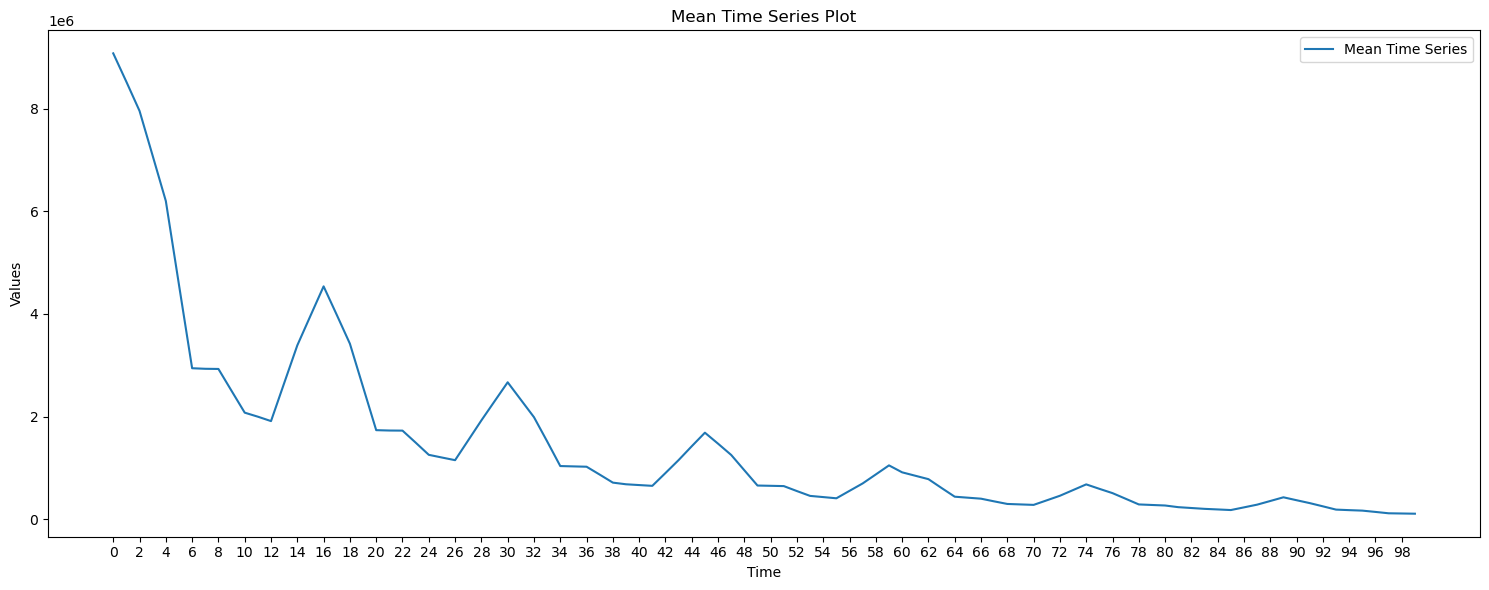

In [28]:
# Calcola la media per ciascun punto temporale
mean_time_series = df_time_series.mean(axis=0)

# Plot della media
plt.figure(figsize=(15, 6))
plt.plot(mean_time_series.index, mean_time_series.values, label='Mean Time Series')

# Etichette ogni due unità
plt.xticks(ticks=mean_time_series.index[::2], labels=mean_time_series.index[::2])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Mean Time Series Plot')
plt.legend()
plt.tight_layout()
plt.show()
